In [319]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [320]:
df=pd.read_csv("BIKE DETAILS.csv")

In [321]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


In [322]:
df.shape

(1061, 7)

In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1061 non-null   object 
 1   selling_price      1061 non-null   int64  
 2   year               1061 non-null   int64  
 3   seller_type        1061 non-null   object 
 4   owner              1061 non-null   object 
 5   km_driven          1061 non-null   int64  
 6   ex_showroom_price  626 non-null    float64
dtypes: float64(1), int64(3), object(3)
memory usage: 58.2+ KB


In [324]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [325]:
(df['ex_showroom_price'].isnull().sum())/len(df['ex_showroom_price'])*100

40.99905749293119

In [326]:
#There is a 40% null value in ex_showroom_price


In [327]:
#Treating the missing value of ex_showroom_price with the median value

In [328]:
df['ex_showroom_price'] = df['ex_showroom_price'].fillna(df['ex_showroom_price'].median())

In [329]:
df['ex_showroom_price'].isnull().sum()

0

1. What is the range of selling prices in the dataset ?

<Axes: xlabel='selling_price', ylabel='Density'>

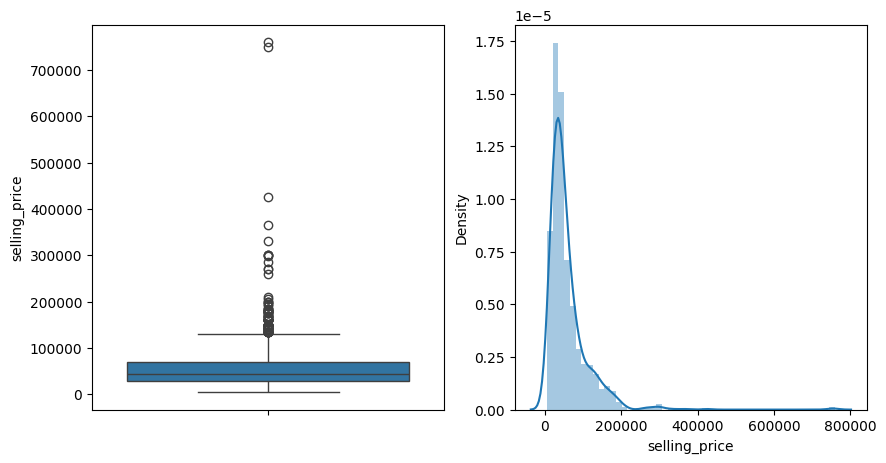

In [330]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(df['selling_price'])

plt.subplot(1,2,2)
sns.distplot(df['selling_price'])

In [331]:
df['selling_price'].describe()

,selling_price
count,1061.000000
mean,59638.151744
std,56304.291973
min,5000.000000
25%,28000.000000
50%,45000.000000
75%,70000.000000
max,760000.000000


In [332]:
selling_price_range = df['selling_price'].max() - df['selling_price'].min()
print("The range of selling prices in the dataset is:", selling_price_range)

The range of selling prices in the dataset is: 755000


There are some outliner in selling_price. It may occur becase some of the bike must fall under super bike catagory.

we can treat these outliners but it need to be discussed with business team first.

Most of the bikes selling price falls under the range of 150000 which can be seen in the above graphs.Out of which the most minimum selling price is 5000 and the maximum selling price is 760000


Q.2. What is the median selling price for bikes in the dataset?

In [333]:
df['selling_price'].median()

45000.0

The median selling prices is 45000

Q.3. What is the most common seller type ?


In [334]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [335]:
df['seller_type']

,seller_type
0,Individual
1,Individual
2,Individual
3,Individual
4,Individual
...,...
1056,Individual
1057,Individual
1058,Individual
1059,Individual


In [336]:
df.seller_type.value_counts()

,count
seller_type,
Individual,1055
Dealer,6


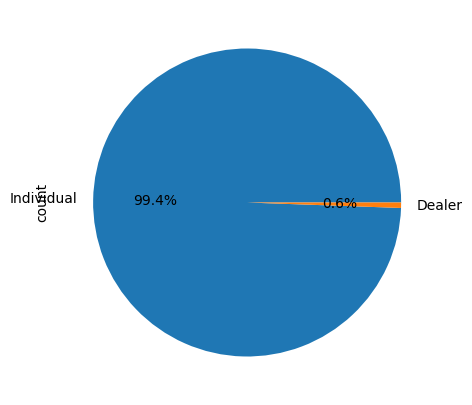

In [337]:
df['seller_type'].value_counts().plot.pie(figsize=(10,5),autopct='%1.1f%%')
plt.show()

As it can been seen clearly that Most of the bikes has been selled directly the owner of the bike. The aoumt of bikes sold by dealer is nearly negligible in comparision.

Q.4.  How many bikes have driven more than 50,000 kilometers ?

In [338]:
len(df[df.km_driven >=50000])

207

There are 207 bikes that has been driven more than 50,000

Q.5. What is the average km_driven value for each ownership type?

In [339]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [340]:
df.groupby('owner')['km_driven'].mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


The above chart represents the average km driven by each owner type


Q.6. What proportion of bikes are from the year 2015 or older

In [341]:
round(len(df[df['year']<=2015])/len(df['year'])*100,2)

56.64

There is 56.64% of bikes which are from 2015 or older

Q.7. What is the trend of missing values across the dataset?

There are no null values in the dataset except for the ex-show room price.Which has been displayed in the start of the code and has been treated with the median value.

It is seen that in case of 1st owner the bike's ex-showroom price is null.


Q.8. What is the highest ex_showroom_price recorded, and for which bike ?

In [342]:
df[df['ex_showroom_price'].max()==df['ex_showroom_price']]

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
134,Harley-Davidson Street Bob,750000,2013,Individual,2nd owner,12000,1278000.0


The highest ex_showroom_price recorded in this dataset is of Harley-Davidson Street Bob	which was Rs. 1278000.0





Q. 9. What is the total number of bikes listed by each seller type?

In [343]:
df.groupby('seller_type')['name'].count()

,name
seller_type,
Dealer,6
Individual,1055


Q.10. What is the relationship between selling_price and km_driven for first-owner bikes ?

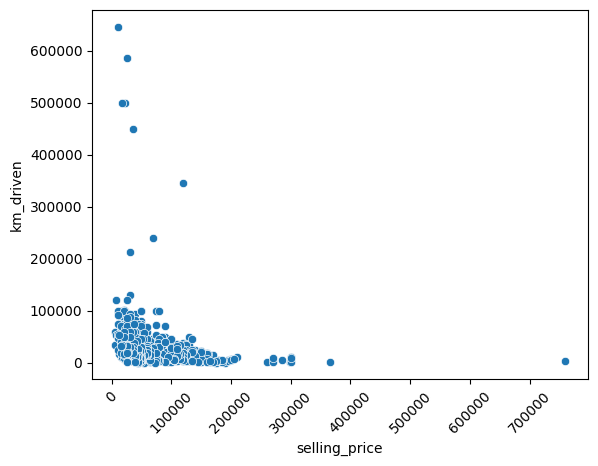

In [344]:
sns.scatterplot(x='selling_price',y='km_driven',data=df[df['owner']=='1st owner'])
plt.xticks(rotation=45)
plt.show()

As it is clearly visible in this graph that most of the 1st owner bike has a km driven below 100000 and its selling price is below 100000

Q. 11.  Identify and remove outliers in the km_driven column using the IQR method.

<Axes: ylabel='km_driven'>

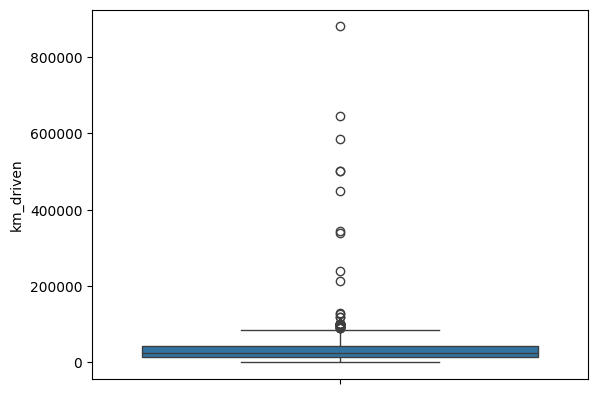

In [345]:
sns.boxplot(df['km_driven'])

In [346]:
#Treating the outliner using IQR method

Q1=df['km_driven'].quantile(0.25)
Q3=df['km_driven'].quantile(0.75)
IQR=Q3-Q1

lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

df=df[(df['km_driven']>=lower_bound) & (df['km_driven']<=upper_bound)]

Q.12.  Perform a bivariate analysis to visualize the relationship between year and selling_price.

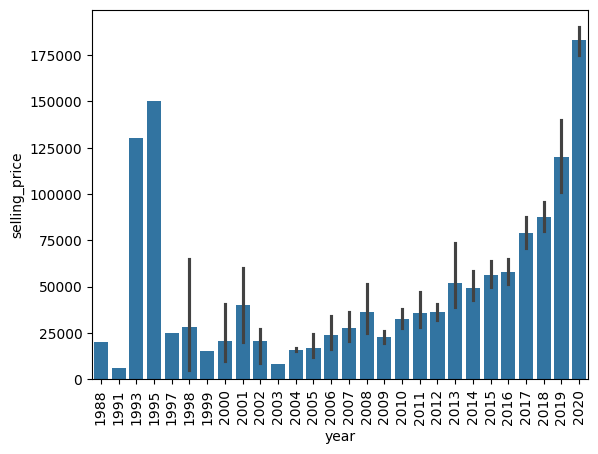

In [347]:
sns.barplot(x='year',y='selling_price',data=df)
plt.xticks(rotation=90)
plt.show()

Q.13. What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year) ?

In [348]:
df['bike_age']=2025-df['year']

In [349]:
depreciation_by_age=df.groupby('bike_age')['selling_price'].mean()

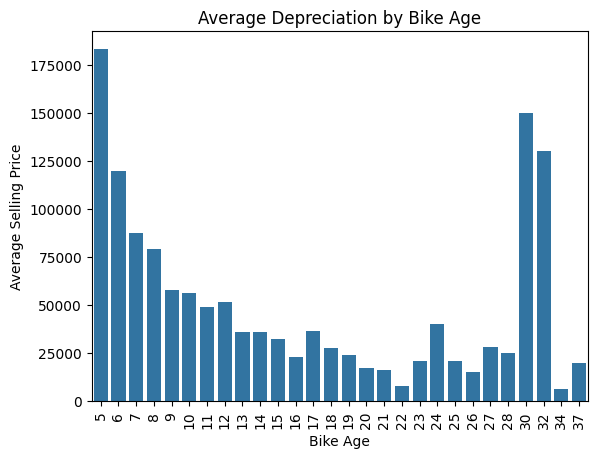

In [350]:
sns.barplot(x=depreciation_by_age.index,y=depreciation_by_age.values)
plt.xlabel('Bike Age')
plt.ylabel('Average Selling Price')
plt.title('Average Depreciation by Bike Age')
plt.xticks(rotation=90)
plt.show()

Q.14. Which bike names are priced significantly above the average price for their manufacturing year?

In [351]:
avg_price_by_year=df.groupby("year")['selling_price'].mean()

In [352]:
df['avg_price_yearwise']=df['year'].map(avg_price_by_year)

In [353]:
df['price_diff']=df['selling_price']-df['avg_price_yearwise']

In [354]:
threas_hold=df['price_diff'].std()

In [355]:
print(df[df['price_diff']>threas_hold]['name'].unique())

['Royal Enfield Classic 350' 'Royal Enfield Classic Gunmetal Grey'
 'Royal Enfield Bullet 350 [2007-2011]' 'Yamaha YZF R3' 'Jawa Standard'
 'Royal Enfield Thunderbird 350' 'Honda CBR-250R' 'KTM 390 Duke'
 'Royal Enfield Electra 5 S' 'Royal Enfield Electra 4 S'
 'Mahindra Mojo XT300' 'Royal Enfield Thunderbird 350X'
 'Royal Enfield Classic Desert Storm' 'UM Renegade Commando'
 'Royal Enfield Continental GT 650' 'Harley-Davidson Street Bob'
 'KTM 390 Duke ABS [2013-2016]' 'Bajaj Dominar 400' 'KTM RC 390'
 'Royal Enfield Bullet 350' 'KTM RC 200' 'Royal Enfield Bullet 500'
 'Bajaj Dominar 400 [2018]' 'Royal Enfield Interceptor 650' 'KTM 250 Duke'
 'Kawasaki Ninja 650 [2018-2019]' 'Kawasaki Ninja 250R' 'Suzuki GSX S750'
 'Harley-Davidson Street 750' 'TVS Apache RR310' 'BMW G310GS'
 'Royal Enfield Thunderbird 500' 'Royal Enfield Himalayan' 'Yamaha FZ25'
 'Royal Enfield Classic Stealth Black'
 'Royal Enfield Classic Squadron Blue' 'Royal Enfield Classic Chrome'
 'Royal Enfield Classic Signals

Q.15.  Develop a correlation matrix for numeric columns and visualize it using a heatmap.

<Axes: >

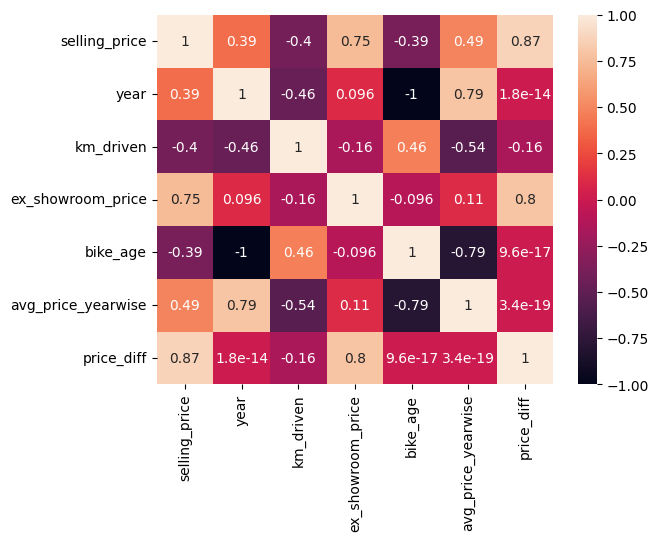

In [356]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [357]:
df1=pd.read_csv("Car Sale.csv")

In [358]:
df1

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [359]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


Q.1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?

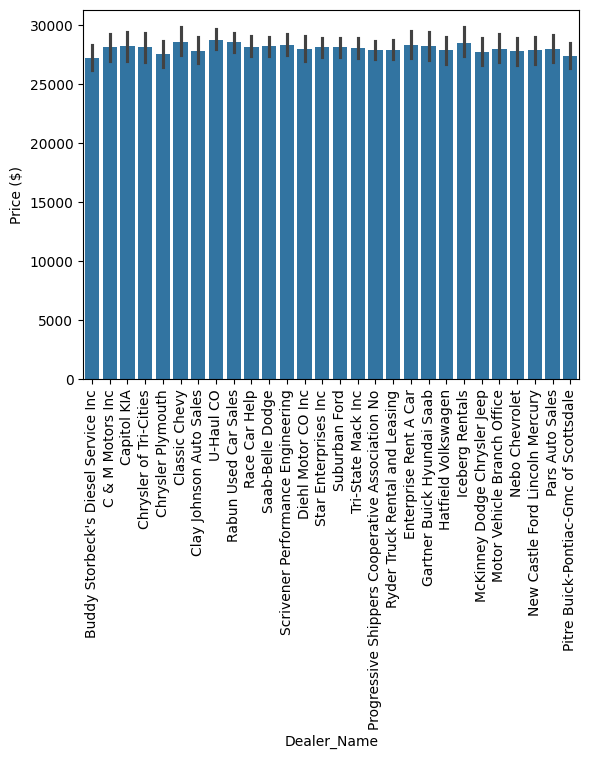

In [360]:
sns.barplot(x='Dealer_Name',y='Price ($)',data=df1)
plt.xticks(rotation=90)
plt.show()

In [361]:
df1.groupby('Dealer_Name')['Price ($)'].mean()

,Price ($)
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27217.261563
C & M Motors Inc,28111.755200
Capitol KIA,28189.703822
Chrysler Plymouth,27555.526400
Chrysler of Tri-Cities,28123.091054
Classic Chevy,28602.014446
Clay Johnson Auto Sales,27816.027113
Diehl Motor CO Inc,27993.929487
Enterprise Rent A Car,28312.580800


Q.2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends?

In [362]:
price_variation=df1.groupby('Company')['Price ($)'].std()

In [363]:
brand_with_highest_variation=price_variation.idxmax()

In [364]:
print(f"The car brand with the highest variation in prices is {brand_with_highest_variation} with a standard deviation of {price_variation.max()}")

The car brand with the highest variation in prices is Lincoln with a standard deviation of 19658.050211265567


Q.3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare?

In [365]:
trans_stat=df1.groupby('Transmission')['Price ($)'].describe()

In [366]:
Auto_IQR= trans_stat.loc['Auto','75%']-trans_stat.loc['Auto','25%']
Man_IQR= trans_stat.loc['Manual','75%']-trans_stat.loc['Manual','25%']

print("The interquartile range for auto transmission is ",Auto_IQR)
print("The interquartile range for manual transmission is ",Man_IQR)

The interquartile range for auto transmission is  16500.0
The interquartile range for manual transmission is  17000.0


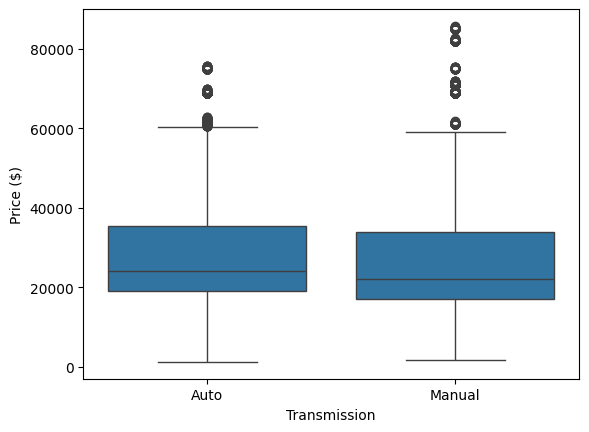

In [367]:
sns.boxplot(x='Transmission', y='Price ($)', data=df1)
plt.show()

Q.4. What is the distribution of car prices across different regions?

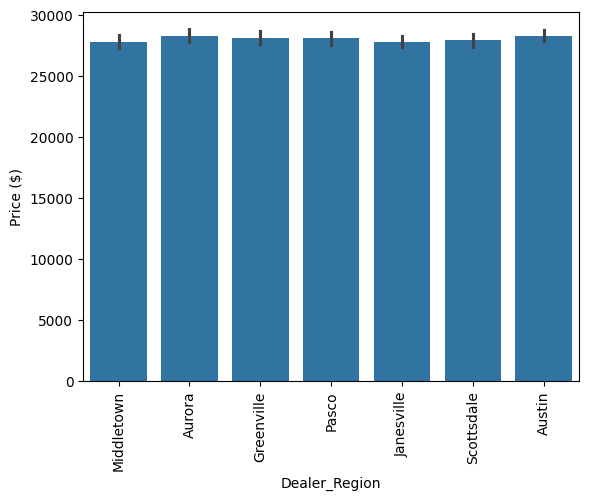

In [368]:
sns.barplot(x='Dealer_Region',y='Price ($)',data=df1)
plt.xticks(rotation=90)
plt.show()

Q. 5. What is the distribution of cars based on body styles?

In [369]:
df1.sample(1)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
15160,C_CND_015161,6/23/2023,Madeline,Male,890000,Hatfield Volkswagen,BMW,323i,DoubleÂ Overhead Camshaft,Auto,Pale White,19001,99301-3882,Hatchback,6731958,Greenville


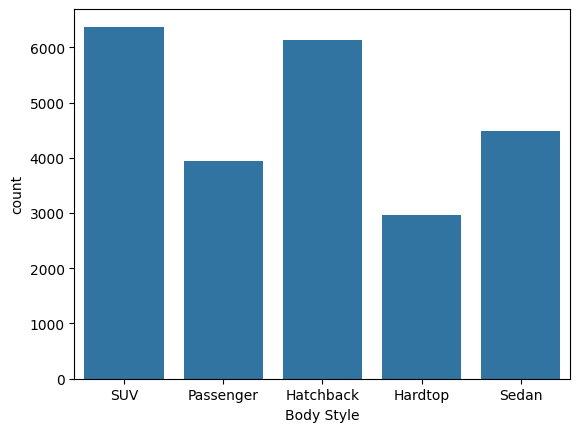

In [370]:
sns.countplot(x='Body Style',data=df1)
plt.show()

Q.6. How does the average selling price of cars vary by customer gender and annual income?

In [371]:
avg_sellprice_gen=df1.groupby(['Gender','Annual Income'])['Price ($)'].mean().reset_index()

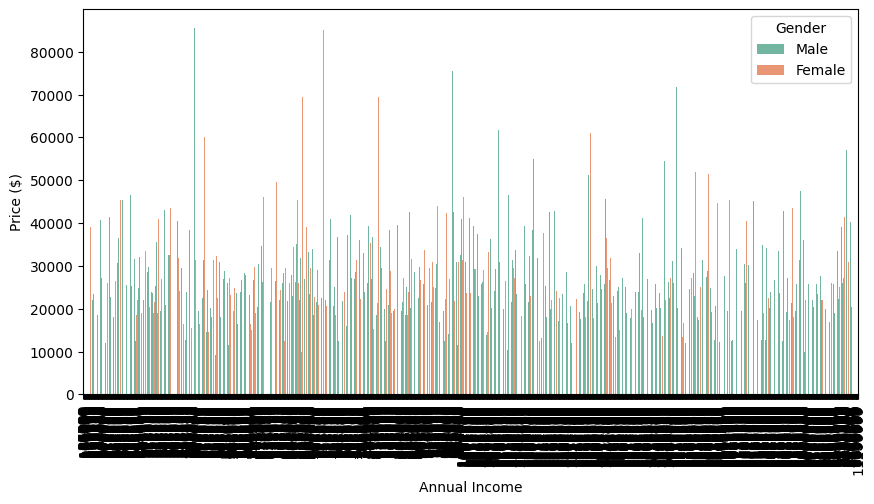

In [372]:
plt.figure(figsize=(10,5))
sns.barplot(x='Annual Income',y='Price ($)',hue='Gender',data=avg_sellprice_gen,palette='Set2')
plt.xticks(rotation=90)
plt.show()

Q.7.  What is the distribution of car prices by region, and how does the number of cars sold vary by region?

In [373]:
df1.sample(2)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
18874,C_CND_018875,9/25/2023,Jeanne,Female,330000,Nebo Chevrolet,Honda,Accord,Overhead Camshaft,Manual,Black,43000,06457-3834,Sedan,6608947,Middletown
6505,C_CND_006506,9/27/2022,Aziliz,Male,1211000,Saab-Belle Dodge,Dodge,Ram Pickup,Overhead Camshaft,Manual,Pale White,16100,60504-7114,Hardtop,6235413,Pasco


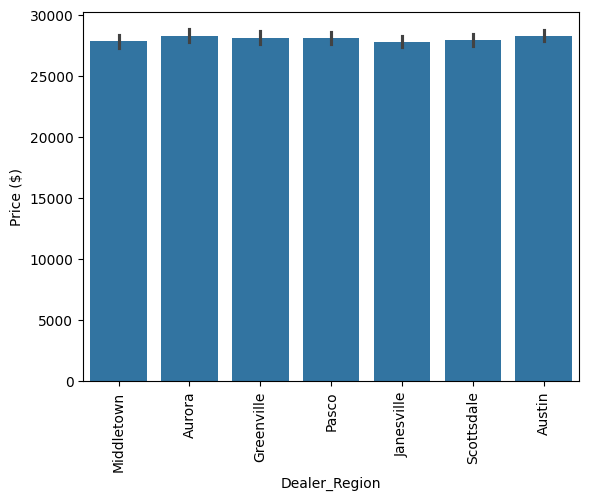

In [374]:
sns.barplot(x='Dealer_Region',y='Price ($)',data=df1)
plt.xticks(rotation=90)
plt.show()

Q.8. How does the average car price differ between cars with different engine sizes?

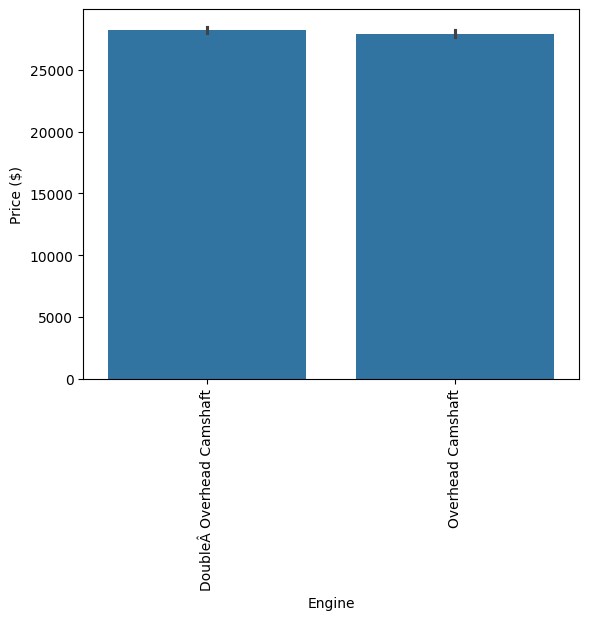

In [375]:
sns.barplot(x='Engine',y='Price ($)',data=df1)
plt.xticks(rotation=90)
plt.show()

It is clearly visible that the average price differ between cars with different engine sizes is negligible



Q.9 How do car prices vary based on the customer’s annual income bracket?

In [376]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [377]:
annualinc_price=df1.groupby('Annual Income')['Price ($)'].mean()[:10]

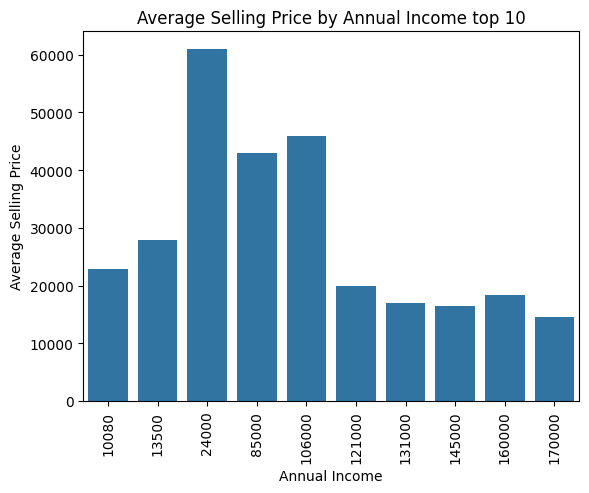

In [378]:
sns.barplot(x=annualinc_price.index,y=annualinc_price.values)
plt.xlabel('Annual Income')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Annual Income top 10')
plt.xticks(rotation=90)
plt.show()

Q.10 What are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [379]:
top_5_model=df1['Model'].value_counts()[:5]

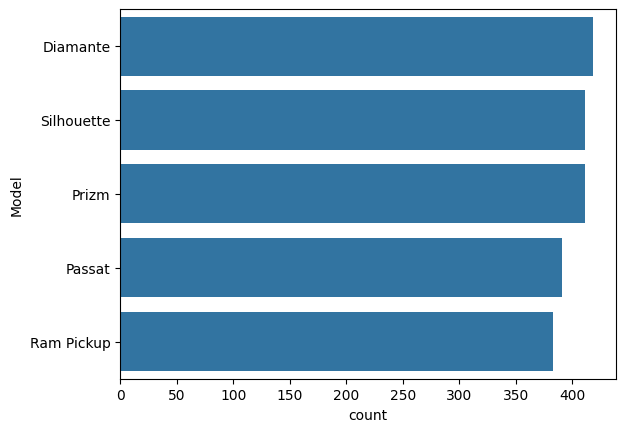

In [380]:
sns.countplot(y='Model',data=df1,order=top_5_model.index)
plt.show()

Q. 11. How does car price vary with engine size across different car colors, and which colors have the highest price
variation?

In [381]:
vary_car_price=df1.groupby(['Color','Engine'])['Price ($)'].mean().reset_index()

In [382]:
vary_car_price

,Color,Engine,Price ($)
0,Black,DoubleÂ Overhead Camshaft,25766.451103
1,Black,Overhead Camshaft,31732.967164
2,Pale White,DoubleÂ Overhead Camshaft,30347.987460
3,Pale White,Overhead Camshaft,24327.767694
4,Red,DoubleÂ Overhead Camshaft,27434.392314
5,Red,Overhead Camshaft,30153.405229


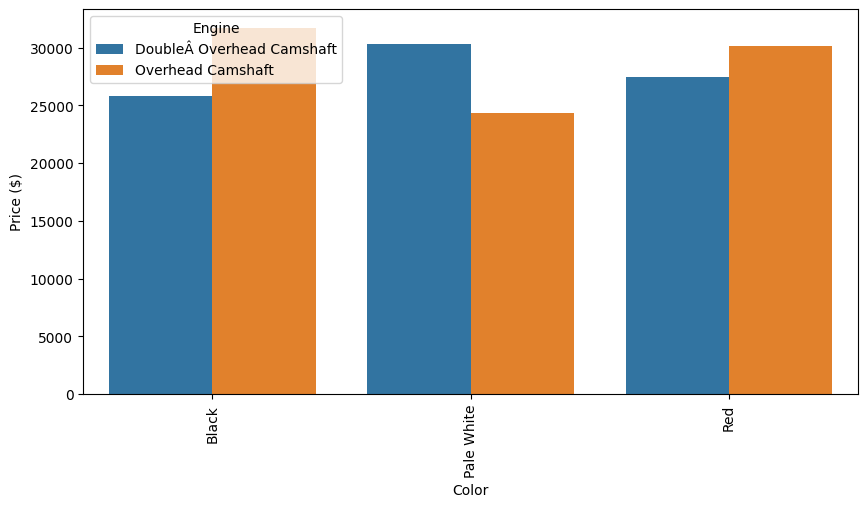

In [383]:
plt.figure(figsize=(10,5))
sns.barplot(x='Color',y='Price ($)',hue='Engine',data=vary_car_price)
plt.xticks(rotation=90)
plt.show()

Q.12. Is there any seasonal trend in car sales based on the date of sale?

In [384]:
df1['Date']=pd.to_datetime(df1['Date'])

In [385]:
df1['month']=df1['Date'].dt.month
df1['quarter']=df1['Date'].dt.quarter

In [386]:
monthly_sale=df1.groupby('month')['Price ($)'].sum()
quarterly_sale=df1.groupby('quarter')['Price ($)'].sum()

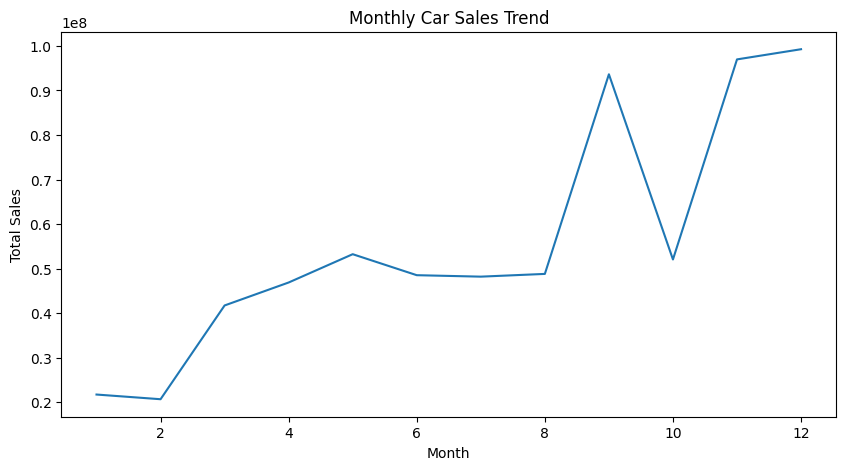

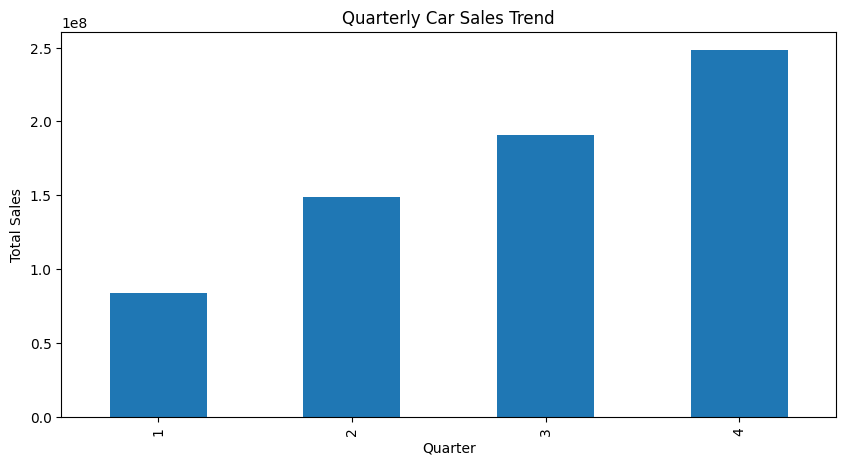

In [387]:
monthly_sale.plot(kind='line', figsize=(10, 5))
plt.title('Monthly Car Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

quarterly_sale.plot(kind='bar', figsize=(10, 5))
plt.title('Quarterly Car Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.show()

Q.13. How does the car price distribution change when considering different combinations of body style and
transmission type?

In [388]:
df1.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'month', 'quarter'],
      dtype='object')

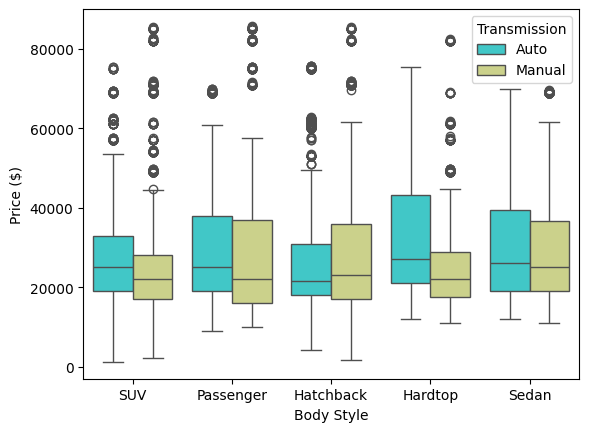

In [389]:
sns.boxplot(x='Body Style',y='Price ($)',hue='Transmission',data=df1,palette='rainbow')
plt.show()

Q.14. What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact?

In [390]:
corr_val=df1[['Price ($)', 'Annual Income']].corr()

<Axes: >

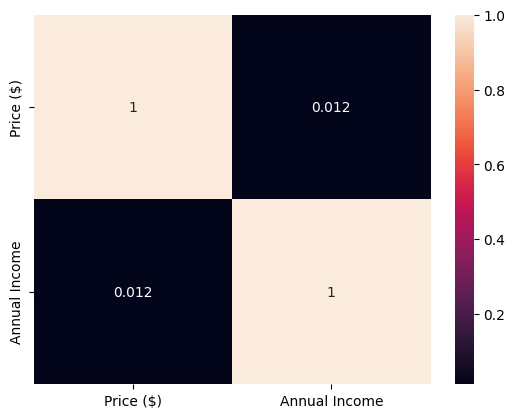

In [391]:
sns.heatmap(corr_val,annot=True)

Q.15. How does the average car price vary across different car models and engine types?

In [392]:
avg_car_price=df1.groupby(['Model','Engine'])['Price ($)'].mean().reset_index()[:20]

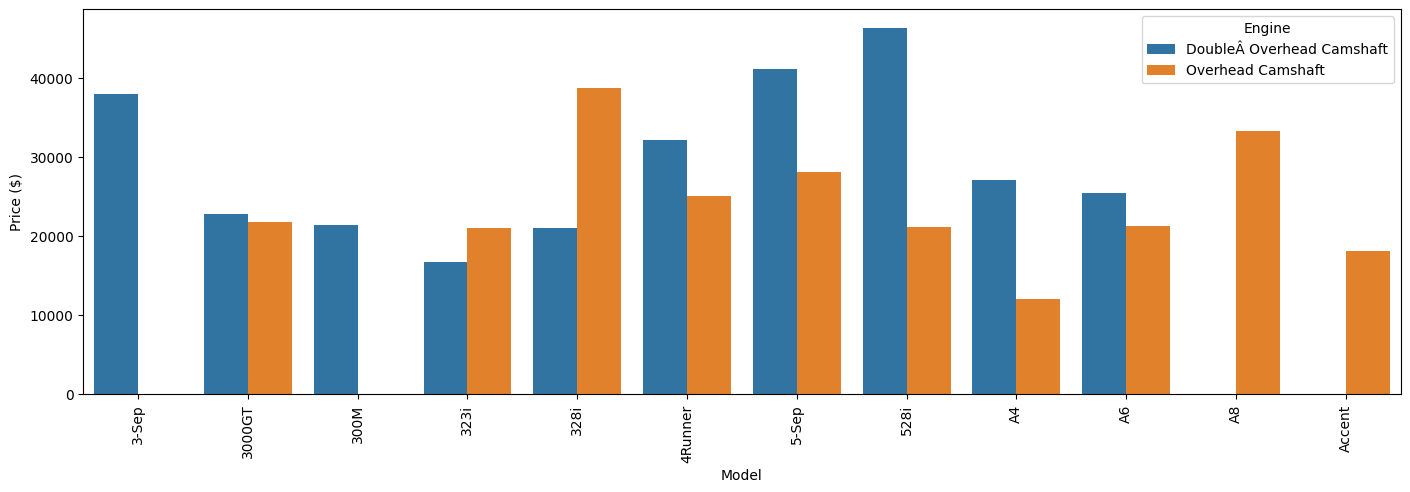

In [393]:
plt.figure(figsize=(17,5))
sns.barplot(x='Model',y='Price ($)',hue='Engine',data=avg_car_price)
plt.xticks(rotation=90)
plt.show()

In [394]:
df2=pd.read_csv("amazon.csv")

In [395]:
df2.shape

(1465, 16)

In [396]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [397]:
df2.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


Q.1 What is the average rating for each product category?

In [398]:
df2['rating']=df2['rating'].str.replace('|',"0")

In [399]:
df2['rating']=pd.to_numeric(df2['rating'])

In [400]:
avr_rating=df2.groupby('category')['rating'].mean()[:20]

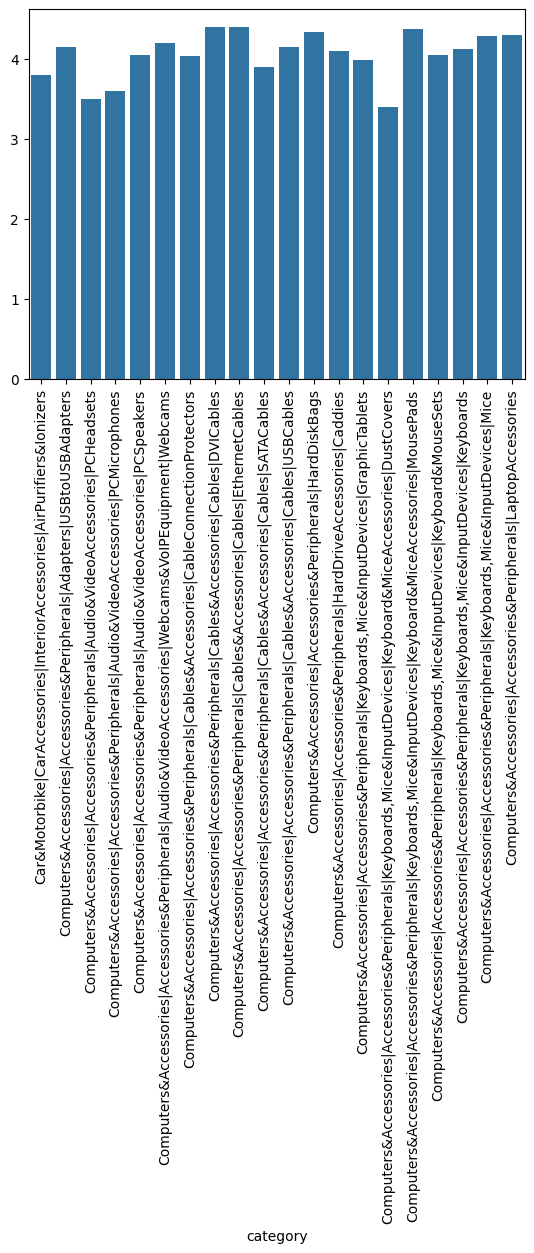

In [401]:
sns.barplot(x=avr_rating.index,y=avr_rating.values)
plt.xticks(rotation=90)
plt.show()

Q.2.  What are the top rating_count products by category?

In [402]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [403]:
df2['rating_count']=df2['rating_count'].str.replace(',',"")

In [404]:
df2['rating_count']=pd.to_numeric(df2['rating_count'])

In [405]:
top_products_by_category = df2.groupby('category').apply(lambda x: x.nlargest(5, 'rating_count'))[['product_name', 'rating_count']]

In [406]:
print(top_products_by_category)

                                                                                              product_name  \
category                                                                                                     
Car&Motorbike|CarAccessories|InteriorAccessorie... 1157  Reffair AX30 [MAX] Portable Air Purifier for C...   
Computers&Accessories|Accessories&Peripherals|A... 695   rts [2 Pack] Mini USB C Type C Adapter Plug, T...   
                                                   742   Kanget [2 Pack] Type C Female to USB A Male Ch...   
Computers&Accessories|Accessories&Peripherals|A... 906   Hp Wired On Ear Headphones With Mic With 3.5 M...   
Computers&Accessories|Accessories&Peripherals|A... 748   JBL Commercial CSLM20B Auxiliary Omnidirection...   
...                                                                                                    ...   
OfficeProducts|OfficePaperProducts|Paper|Statio... 858   Pilot V7 Liquid Ink Roller Ball Pen (2 Blue + ...   
OfficeProd

Q.3. What is the distribution of discounted prices vs. actual prices?

In [407]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

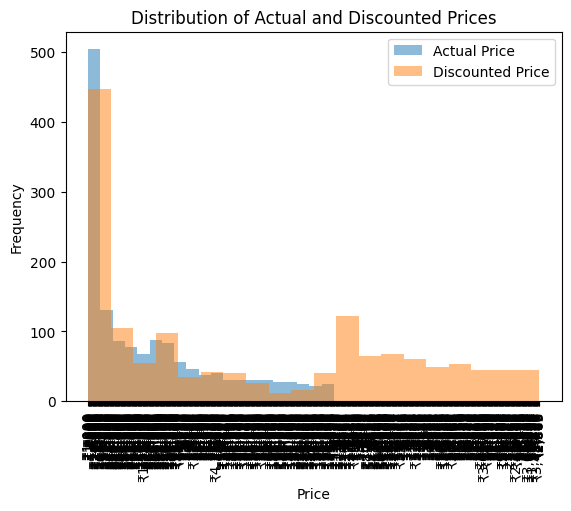

In [408]:
plt.hist(df2['actual_price'], bins=20, alpha=0.5, label='Actual Price')
plt.hist(df2['discounted_price'], bins=20, alpha=0.5, label='Discounted Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Actual and Discounted Prices')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

Q.4  How does the average discount percentage vary across categories?

In [409]:
df2['discount_percentage']=df2['discount_percentage'].str.replace('%','')

In [410]:
df2['discount_percentage']=pd.to_numeric(df2['discount_percentage'])

In [411]:
avg_dis_cat=df2.groupby('category')['discount_percentage'].mean()[:20]

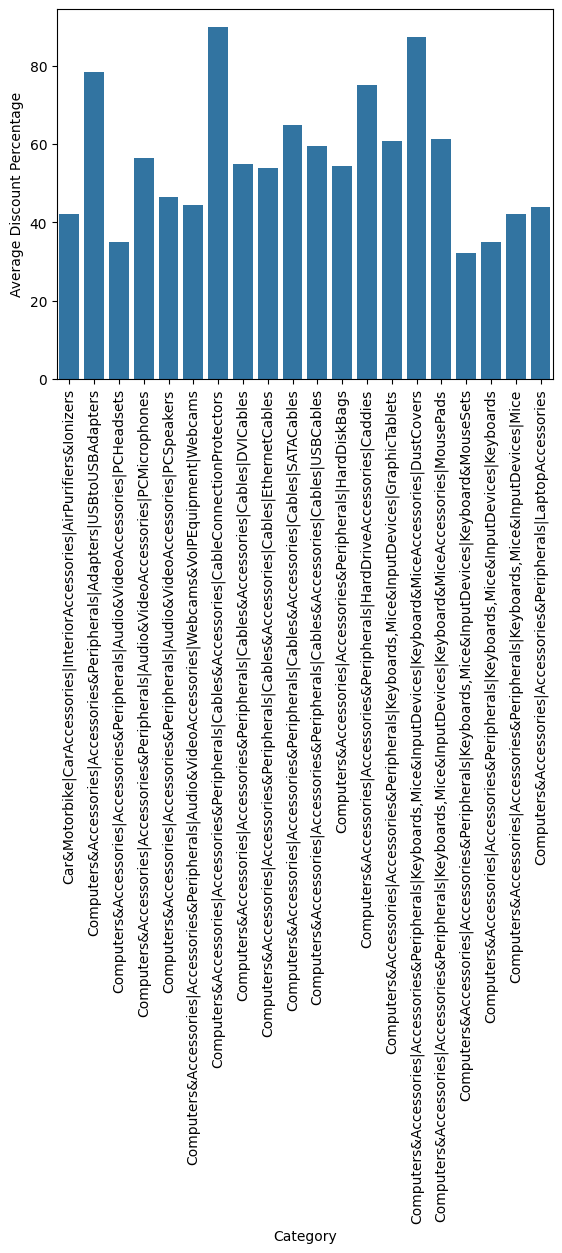

In [412]:
sns.barplot(x=avg_dis_cat.index,y=avg_dis_cat.values)
plt.xlabel('Category')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=90)
plt.show()

Q.5. What are the most popular product names?

In [413]:
df2.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

In [414]:
df2['product_name'].value_counts().head(10)

,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",3
MI Braided USB Type-C Cable for Charging Adapter (Red),3
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",3
"Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus",3
"Amazon Basics USB Type-C to USB-A 2.0 Male Fast Charging Cable for Laptop - 3 Feet (0.9 Meters), Black",3
"boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)",3
"Duracell USB C To Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black",3


Q.6.  What are the most popular product reviews.





In [415]:
popular_products = df2.sort_values(by=['rating_count'], ascending=False)

In [416]:
for index, row in popular_products.head(10).iterrows():
  print(f"Product: {row['product_name']}")
  print(f"Rating Count: {row['rating_count']}")

Product: AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot
Rating Count: 426973.0
Product: Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black
Rating Count: 426973.0
Product: Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black
Rating Count: 426973.0
Product: AmazonBasics Flexible Premium HDMI Cable (Black, 4K@60Hz, 18Gbps), 3-Foot
Rating Count: 426972.0
Product: boAt Bassheads 100 in Ear Wired Earphones with Mic(Furious Red)
Rating Count: 363713.0
Product: boAt Bassheads 100 in Ear Wired Earphones with Mic(Taffy Pink)
Rating Count: 363713.0
Product: boAt BassHeads 100 in-Ear Wired Headphones with Mic (Black)
Rating Count: 363711.0
Product: Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Storage) | Octa-core Helio G35 | 5000 mAh Battery
Rating Count: 313836.0
Product: Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Storage) | 2GHz Octa-core Helio G25 Processor | 5000 mAh Battery
Rating Count: 313836.0
Product: Redmi 9A Sport (Carbon B

Q.8 What is the correlation between discounted_price and rating?

In [425]:
df2['discounted_price']= df2['discounted_price'].astype(str)

In [426]:
df2['discounted_price'] = df2['discounted_price'].str.replace('₹', ' ')

In [433]:
df2['discounted_price'] = pd.to_numeric(df2['discounted_price'], errors='coerce')
df2['rating'] = pd.to_numeric(df2['rating'], errors='coerce')

In [434]:
correlation = df2['discounted_price'].corr(df2['rating'])
print(f"The correlation between discounted_price and rating is: {correlation}")

The correlation between discounted_price and rating is: nan


Q.9.  What are the Top 5 categories based on the highest rating?

In [435]:
avr_rating = df2.groupby('category')['rating'].mean().sort_values(ascending=False)
top_5_categories = avr_rating.head(5)
print(top_5_categories)

category
Computers&Accessories|Tablets                                               4.6
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters    4.5
Electronics|Cameras&Photography|Accessories|Film                            4.5
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                4.5
OfficeProducts|OfficeElectronics|Calculators|Basic                          4.5
Name: rating, dtype: float64
